<a href="https://colab.research.google.com/github/nosdeased/analise_preditiva/blob/main/analise_preditiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#instalar esses pácotes
#Mercado financeiro B3
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
# Libs necessarias

# Pacotes analise de dados
import pandas as pd
import pandas_datareader.data as web
import numpy as np

# Pacotes analise gráfica
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Função para data
from datetime import datetime

# YFinance
import yfinance as yf
yf.pdr_override()

# import warnings
import warnings
warnings.filterwarnings('ignore')


**API Yahoo Finance**

O yfinance oferece uma maneira segmentada e Pythonic de baixar dados de mercado do Yahoo!Ⓡ finanças .


In [22]:
# Coletando os dados
Dados = web.get_data_yahoo( 'WEGE3.SA', period='1y' )

# Shape
Dados.shape

[*********************100%***********************]  1 of 1 completed


(252, 6)

In [23]:
# Verificando 
Dados.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-08,30.770000,30.940001,30.049999,30.219999,29.690409,6430500
2022-02-09,30.540001,30.969999,30.270000,30.290001,29.759186,5009700
2022-02-10,30.290001,30.549999,29.620001,29.740000,29.218819,8569200
2022-02-11,29.799999,30.010000,29.459999,29.530001,29.012501,9352700
2022-02-14,29.500000,30.940001,29.500000,30.440001,29.906555,10962400


In [24]:
# Ultimos registros
Dados.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-02,38.130001,38.980000,37.709999,38.040001,38.040001,7112600
2023-02-03,37.840000,38.599998,37.709999,37.910000,37.910000,8093400
2023-02-06,37.840000,38.029999,37.220001,37.570000,37.570000,6881500
2023-02-07,37.500000,37.889999,37.230000,37.669998,37.669998,8673800
2023-02-08,37.650002,37.930000,37.650002,37.919998,37.919998,243900


In [25]:
# Estatistica descritiva
Dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,32.077580,32.635476,31.567262,32.096190,31.935372,8.386113e+06
std,4.744633,4.853895,4.685700,4.786993,4.858896,3.715495e+06
min,23.420000,23.629999,22.820000,22.830000,22.610670,0.000000e+00
25%,28.232501,28.639999,27.757500,28.257501,28.112460,6.000975e+06
50%,31.055000,31.820000,30.660000,31.230000,30.964751,7.586550e+06
75%,37.289999,37.892500,36.790000,37.335001,37.335001,1.014268e+07
max,40.900002,42.419998,40.480000,40.900002,40.840641,2.981270e+07


In [26]:
# Informações
Dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-02-08 to 2023-02-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


## **Média Móvel**

A média móvel é um indicador que faz parte da Análise Técnica de ações. Com ela, é possível identificar o equilíbrio dos preços no mercado, observando tendências de alta, neutra ou baixa. A representação gráfica das médias móveis é normalmente feita por uma linha, que se movimenta conforme os dados novos recebidos para o cálculo.

O que é a média móvel?

A média móvel é um indicador importante que suaviza os dados dos preços das ações para formar um indicador que segue a tendência.

E como fazer esse cálculo?
Basta utilizar a fórmula: MMA = Soma dos preços de fechamento ÷ Número de dias

Considere a média móvel aritmética de 5 dias e sua evolução ao longo de 3 dias, em que os preços diários de fechamento são:
11,12,13,14,15,16 e 17.

Primeiro dia da MMA de 5 dias: (11 + 12 + 13 + 14 + 15) ÷ 5 = 13
Segundo dia da MMA de 5 dias: (12 + 13 + 14 + 15 + 16) ÷ 5 = 14
Terceiro dia da MMA de 5 dias: (13 + 14 + 15 + 16 + 17) ÷ 5 = 15


In [27]:
# Media Simples
Lista = [11, 12, 13, 15, 16, 17]
  
from statistics import mean  as Media
print(f'Media: { Media(Lista)}')
print(f'Media: {(11+12+13+15+16+17) / len(Lista) } ')

Media: 14
Media: 14.0 


In [28]:
Media(Lista)

14

In [29]:
# Periodo da média móvel

n = 5

for Intervalo in range(3):
  print(f'{Intervalo}ª Dia: { sum(Lista[Intervalo:n]) / 5 }')

0ª Dia: 13.4
1ª Dia: 11.2
2ª Dia: 8.8


Text(0.5, 1.0, 'Preço Fechamento')

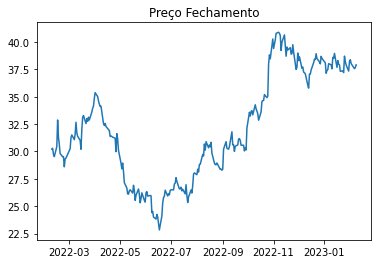

In [30]:
# Plot
plt.plot( Dados['Close'])
plt.title('Preço Fechamento')

**Função rolling**

A função rolling() é uma função do pandas que permite calcular estatísticas em janelas deslizantes de dados. <br>
Ela é muito útil para calcular médias móveis, desvios padrão, somatórios, mínimos e máximos, entre outras estatísticas.

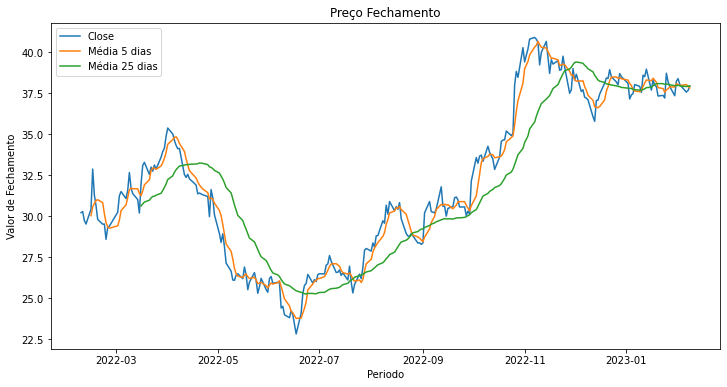

In [31]:
from pandas.core  import window
Periodo = 5
Dados['Close'].rolling( window=Periodo ).mean()

# Tamanho da imagem
plt.figure( figsize=(12, 6) )

plt.plot( Dados['Close'])
plt.plot( Dados['Close'].rolling( window=Periodo ).mean())
plt.plot( Dados['Close'].rolling( window=Periodo + 20 ).mean())
plt.title('Preço Fechamento')
plt.legend(['Close', 'Média 5 dias', 'Média 25 dias'])
plt.ylabel('Valor de Fechamento')
plt.xlabel('Periodo');

## **Plotly**

O PLOTLY é uma biblioteca Python de plotagem interativa e de código aberto que oferece suporte a mais de 40 tipos de gráficos exclusivos, abrangendo uma ampla variedade de casos de uso estatísticos, financeiros, geográficos, científicos e tridimensionais.

plotly.express (px) é uma maneira rápida e fácil de criar visualizações dinâmicas de dados.
plotly.graph_objects (go) é a API de nível inferior que concede mais controle sobre suas visualizações, mas é mais intensiva em código..

In [32]:
Periodo = 5
Dados['Media_Movel'] = Dados['Close'].rolling( window=Periodo ).mean()

Figure = px.line(
    Dados,
    y='Close',
    title='Fechamento'
)

Figure.show()


In [33]:
Figure_02 = go.Figure(
    data=go.Scatter(
        x=Dados.index,
        y=Dados['Close'],
        line=( dict(color='firebrick', width=3) )
    )
)

Figure_02.update_layout(
    title='Análise de Fechamento',
    xaxis_title='Periodo',
    yaxis_title='Preço de fechamento'
)

Figure_02.show()

## **Candlestick Charts**
<br>
É um estilo de gráfico financeiro que descreve abertura, alta, baixa e fechamento para uma determinada xcoordenada (tempo mais provável). As caixas representam a dispersão entre os valores opene closee as linhas representam a dispersão entre os valores lowe high. Pontos de amostragem onde o valor de fechamento é maior (inferior) do que o valor de abertura são chamados de crescentes (decrescentes). Por padrão, as velas crescentes são desenhadas em verde, enquanto as decrescentes são desenhadas em vermelho.

In [34]:
# Grafico clandestik
Grafico_Candlestick = go.Figure(
    data=[
        go.Candlestick(
            x=Dados.index,
            open=Dados['Open'],
            high=Dados['High'],
            low=Dados['Low'],
            close=Dados['Close'],
            increasing_line_color='red',
            decreasing_line_color='green'
        )
    ]
)


Grafico_Candlestick.update_layout(
    xaxis_rangeslider_visible=False,
    title='Análise Fechamento',
    xaxis_title='Periodo',
    yaxis_title='Preço de Fechamento'
)


Grafico_Candlestick.show()

## **Criando Relátorio**

In [ ]:
# Criar a Figura
Figura = make_subplots(
    rows=2,
    cols=1,
    specs=[
        [{'type':'scatter'}],
        [{'type':'scatter'}]
    ],
    vertical_spacing=0.075,
    shared_xaxes=True,
    subplot_titles=('Cotação', 'Fechamento')
)

# Layout e Dimensão
Figura.update_layout(
    width=1000,
    height=800,
    title_text='<b>Advanced Analytics</b> <br>Follow-up WEG S.A'
)

# Adicionado um gráfico na 1º Posição
Figura.add_trace(
    go.Candlestick(
        x=Dados.index,
        open=Dados['Open'],
        high=Dados['High'],
        low=Dados['Low'],
        close=Dados['Close'],
        increasing_line_color='red',
        decreasing_line_color='green'
    ),
    row=1, col=1
)

Figura.add_trace(
    go.Scatter(
        x=Dados.index,
        y=Dados['Media_Movel'],
        mode='lines',
        name='Média Móvel',
        line=dict(color='yellow')
    ),
    row=1, col=1
)

Figura.update_layout(
    xaxis_rangeslider_visible=False
)

# Adicionado um gráfico na 2º Posição
Figura.add_trace(
    go.Scatter(
        x=Dados.index,
        y=Dados['Close'],
        mode='lines',
        name='Fechamento',
        line=dict(color='green')
    ),
    row=2, col=1
)

Figura.add_trace(
    go.Scatter(
        x=Dados.index,
        y=Dados['Media_Movel'],
        mode='lines',
        name='Média Móvel',
        line=dict(color='red')
    ),
    row=2, col=1
)

Figura.update_layout(
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
        font=dict( size=10) 
    )
)

Figura.add_annotation(
    showarrow=False,
    text='Análise feita no evento de Python',
    font=dict(size=14),
    xref='x domain',
    x=1,
    yref='y domain',
    y=-1.4
)

Figura.add_annotation(
    showarrow=False,
    text='By: @Edson S Costa',
    font=dict(size=14),
    xref='x domain',
    x=0,
    yref='y domain',
    y=-1.4
)

Figura.show()

## **Exportando PDF**

Kaleido
Kaleido é uma biblioteca de plataforma cruzada para geração de imagens estáticas (por exemplo, png, svg, pdf, etc.) para bibliotecas de visualização baseadas na web, com foco particular na eliminação de dependências externas. O foco inicial do projeto é a exportação de imagens plotly.js do Python para uso por plotly.py, mas ele foi projetado para ser relativamente direto para estender a outras bibliotecas de visualização baseadas na web e outras linguagens de programação. O foco principal do Kaleido (pelo menos inicialmente) é servir como uma dependência de bibliotecas de visualização baseadas na web, como plotly.py. Como tal, o foco está em fornecer uma API programática, em vez de amigável ao usuário.

In [35]:
# Reiniciei o servidor

In [36]:
#!pip install -U kaleido

In [37]:
Figura.write_image('Report_Fiananceiro.pdf')

ValueError: ignored